# **Statistical Analysis of Factors Affecting Loan Interest Rates and Borrower Risk**

## Background:
A fintech startup aims to enhance customer loan offers by leveraging data-driven insights. Utilizing the [🔗Bondora P2P Loans](https://www.kaggle.com/datasets/marcobeyer/bondora-p2p-loans?select=LoanData.csv) dataset, this project focuses on identifying key factors that influence a borrower's interest rate. Through comprehensive data analysis and feature exploration, the objective is to develop a predictive model capable of accurately estimating loan interest rates. This model will support the company in personalizing loan terms efficiently, optimizing customer experience and risk management.


The features used in this lab are:

- `VerificationType`: Method used for loan application data verification
- `Age`: Age of the borrower (years)
- `AppliedAmount`: Amount applied
- `Amount`: Amount the borrower received
- `Interest`: Interest rate
- `LoanDuration`: The loan term
- `Education`: Education of the borrower
- `EmploymentDurationCurrentEmployer`: Employment time with the current employer
- `HomeOwnershipType`: Home ownership type
- `IncomeTotal`: Total income
- `ExistingLiabilities`: Borrower's number of existing liabilities
- `RefinanceLiabilities`:  The total amount of liabilities after refinancing
- `Rating`: Bondora Rating issued by the Rating model
- `NoOfPreviousLoansBeforeLoan`: Number of previous loans
- `AmountOfPreviousLoansBeforeLoan`: Value of previous loans

## Table of Contents
- [Step 1: Importing Libraries](#step-1)
- [Step 2: Load and Clean the Data](#step-2)
    - [Load the data](#load-the-data)
    - [Cleaning the Dataset](#cleaning-the-dataset)
        - [2.1: Set Index](#ex1)
- [Step 3: Retrieving Key Metrics](#step-3)
    - [Describing the Dataset](#describing-the-dataset)
        - [3.1: Descriptive Statistics](#ex2)
    - [High-Risk Customers](#high-risk-customers)
        - [3.2: Identifying High-Risk customers](#ex3)
- [Step 4: Understanding different customer profiles](#step-4)
    - [Visualization of Different Profiles](#visualization-of-different-profiles)
        - [4.1: Segmentation Using Box Plots](#ex4)
        - [4.2: Scatter Plots and Correlation](#ex5)
    - [Applied and Received Amounts](#applied-and-received-amounts)
        - [4.3: Confidence Intervals](#ex6)
- [Step 5: Modelling the Interest Rate](#step-5)
    - [Simple Linear Regression](#categorical-features)
        - [5.1: Training the Linear Regression](#ex7)
    - [Building a More Complex Linear Regression Model](#building-the-linear-regression-model)
        - [5.2: Building and Refining the Model](#ex8)

<a id="step-1"></a>

## Step 1: Importing libraries

Before we start working on the dataset, it is good practice to import all libraries at the beginning of our code.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

1. Run the cell below to import the following libraries: Pandas, Matplotlib's Pyplot and Seaborn.
        
</div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from math import sqrt

<a id="step-2"></a>

## Step 2: Load and Clean the Data

### Load the Data
Now that we have imported the right libraries, we can use Pandas to load the data from the CSV.
        
1. Run the cell below to:
    1. Import the data
    2. Save the DataFrame into a variables named <code>cars</code>
    3. View the data using the <code>head()</code> method
            
        
</div>

In [ ]:
# 🔒This cell is locked. You will not be able to edit it.
# load the data
df = pd.read_csv("data/LoanData.csv")
df.head()

,LoanId,NewCreditCustomer,LoanDate,VerificationType,Age,Gender,Country,AppliedAmount,Amount,Interest,...,EmploymentDurationCurrentEmployer,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,Rating,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,D8EBF360-104C-420F-BEC9-000924E6EFC7,False,2022-09-09,By Bank Statement,27,Female,EE,3189.0,3189.0,35.48,...,UpTo5Years,Other,900.0,0,0.00,0,D,1.0,3402.0,0.0
1,C1A98DDA-5E20-429C-BBFF-0009A05354E0,False,2023-05-19,By Bank Statement,35,Female,FI,4146.0,4146.0,19.86,...,UpTo5Years,Owner,3100.0,0,0.00,0,B,1.0,518.0,0.0
2,9B0B252E-45B9-4172-8E2D-0014A8F18117,False,2024-02-03,By Bank Statement,23,Male,EE,531.0,531.0,19.52,...,UpTo5Years,TenantFurnished,1700.0,0,0.00,0,B,3.0,1593.0,0.0
3,66AE108B-532B-4BB3-BAB7-0019A46412C1,False,2016-03-23,By Bank Statement,53,Female,EE,2125.0,2125.0,20.97,...,MoreThan5Years,Owner,354.0,8,485.09,6,C,1.0,500.0,0.0
4,C7EA512A-465D-4043-A9F2-001B14C3C14E,False,2023-09-26,By Bank Statement,43,Male,FI,414.0,414.0,19.89,...,Other,TenantFurnished,1200.0,0,0.00,0,D,5.0,11198.0,0.0


<a id="cleaning-the-dataset"></a>

### Cleaning the Dataset

Before starting our analysis, take some time to familiarize with the dataset to understand the available information. This is also a good opportunity to clean the data by removing missing values and adjusting the index.

<a id="ex1"></a>

#### 2.1: Set the Index

Explore the dataset to find the number of rows, columns, and data types of each feature. Identify any missing values.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

1. Since the loan ID is unique identifier for each loan, set the `"LoanId"` column as the index

</div>

In [ ]:
df.set_index("LoanId", inplace=True)

In [ ]:
# 🔒This cell is locked. You will not be able to edit it.
# check the index is correct
df.index.name

'LoanId'

<a id="step-3"></a>

## Step 3: Retrieving key metrics
To recommend loan offers, take a moment to understand the loan amounts and ratings. We’ll also want to get a rough idea of the interest rates being paid.

<a id="describing-the-dataset"></a>

### Describing the dataset

#### 3.1: descriptive statistics

1. Find the sample mean and standard deviation for `"Interest"`
2. Find the number of times borrowers got a lower amount than they applied for
3. Use `.value_counts()` to explore the proportion of each rating in the dataset       

</div>



In [ ]:
interest_mean = df["Interest"].mean()
interest_std = df["Interest"].std()

num_less_amount = (df["Amount"] < df["AppliedAmount"]).sum()
rating_proportion = df["Rating"].value_counts(normalize=True)

In [ ]:
# 🔒This cell is locked. You will not be able to edit it.
# print the results
print("Interest rate mean:", round(interest_mean, 2))
print("Interest rate standard deviation:", round(interest_std,2))
print("Number of borrowers that received less money than they asked for:", num_less_amount)
print("Proportion of loan ratings:\n", rating_proportion.sort_index())

Interest rate mean: 27.29
Interest rate standard deviation: 18.03
Number of borrowers that received less money than they asked for: 10543
Proportion of loan ratings:
 Rating
A     0.043291
AA    0.024826
B     0.179124
C     0.317741
D     0.206457
E     0.115707
F     0.074443
HR    0.038411
Name: proportion, dtype: float64


<a id="high-risk-customers"></a>

### High-Risk Customers

Customers with a high debt-to-income ratio and less job stability may have more difficulty repaying loans, making them riskier.

#### 3.2: Identifying High-Risk Customers
We want to identify these customers and be able to add a flag to their loans. We consider borrowers to have less job stability if they have been on the current job for less than 1 year (including those in the trial period). In this scenario, a loan-to-rate ratio above 0.35 is considered risky.
        
1. Add a column named `"DebtToIncome"` with the ratio between "Amount" and "IncomeTotal"
2. Create a new column called `"IsRisky"`, which is `True` if the loan is risky, and `False` otherwise
    * To assess wether a loan is risky Check if the borrower has a `"DebtToIncome"` **greater than or equal** to 0.35, **and** the employment duration is "TrialPeriod" or  "UpTo1Year"
3. Find the proportion of risky loans
4. Find the mean interest rate for risky loans
5. Find the mean interest rate for non-risky loans

In [ ]:
df["DebtToIncome"] = df["Amount"] / df["IncomeTotal"]

df["IsRisky"] = (
    (df["DebtToIncome"] >= 0.35) &
    (df["EmploymentDurationCurrentEmployer"].isin(["TrialPeriod", "UpTo1Year"]))
)

risky_proportion = df["IsRisky"].mean()
mean_interest_risky = df[df["IsRisky"] == True]["Interest"].mean()
mean_interest_non_risky = df[df["IsRisky"] == False]["Interest"].mean()

In [ ]:
# 🔒This cell is locked. You will not be able to edit it.
# print the results
print("Risky loans proportion:", round(risky_proportion, 4))
print("Mean interest rate of risky loans:", round(mean_interest_risky, 4))
print("Mean interest rate of non-risky loans:", round(mean_interest_non_risky, 4))

Risky loans proportion: 0.1588
Mean interest rate of risky loans: 28.8592
Mean interest rate of non-risky loans: 26.9899


**Reflect:** Compare the interest rate for risky loans with that of the non-risky ones, and the interest rate of the total dataset. Does it seem to reflect a riskier nature?

<a id="step-4"></a>

## Step 4: Understanding different customer profiles

As a fintech analyst, understanding customer profiles allows we to identify patterns. We want to understand how different factors of the borrowers influence loan applications.

<a id="visualization-of-different-profiles"></a>

### Visualization of different profiles

To help we identify the different profiles, we decide to use our visualization skills to uncover actionable patterns for tailoring loan offers.

<a id="ex4"></a>
#### 4.1: Segmentation using box plots
<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

1. Create a figure with size (10, 6)
2. Use that figure to create a horizontal box plot of the "Interest" for each category in "Education". The interest rates should be on the x-axis, and education level on the y-axis
3. Improve the chart
    1. Set the x-axis label to "Interest Rate"
    2. Use  the "colorblind" color palette
    3. Set the title to "Interest Rate by Education Level"
    4. Despine the chart by removing the top and right borders
</div>



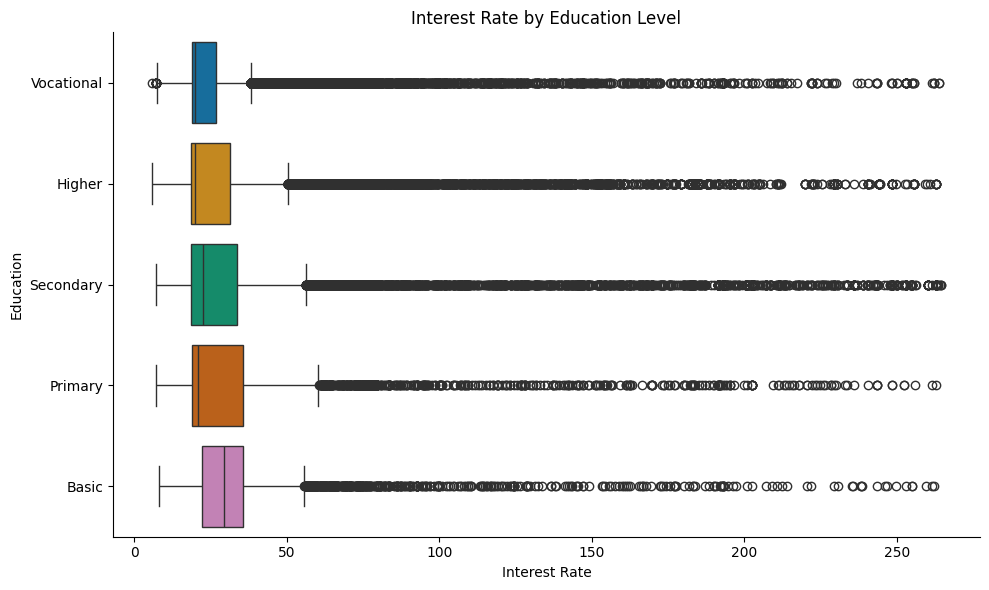

In [ ]:
plt.figure(figsize=(10,6))

boxplot_ax = sns.boxplot(
    data=df,
    x="Interest",
    y="Education",
    orient="h",
    hue="Education",
    palette="colorblind",
    dodge=False
)

boxplot_ax.set_xlabel("Interest Rate")
boxplot_ax.set_title("Interest Rate by Education Level")

legend = boxplot_ax.get_legend()
if legend is not None:
    legend.remove()

sns.despine()

plt.tight_layout()
plt.show()

#### 4.2: Scatter plots and correlation
We also want to investigate the relationship between certain numerical features and the interest rate. For that, we decide to use scatter plots, along with the correlation between features.
        
1. Create a list named `corr_columns` with the columns we want to use for segmentation: "LoanDuration", "IncomeTotal", "AmountOfPreviousLoansBeforeLoan", and "DebtToIncome"
2. Create a `for` loop to iterate over the indexes for each subplot we want to create. Remember that subplots start counting at 1.
3. In each iteration:
    1. Create a new `subplot`, it should have 2 rows and 2 columns
    2. Create a scatter plot between the current `corr_columns` value and `Interest`. We want `Interest` in the y-axis
    3. Calculate the correlation between the current feature and `Interest`
    4. Add it to the `correlation` list
4.  Set the suptitle of the figure to "Correlation between Interest Rate and Loan Duration, Total Income, Amount Of Previous Loans Before Loan, and Debt To Income"
</div>

Correlation between Interest Rate and LoanDuration:
-0.0106
Correlation between Interest Rate and IncomeTotal:
-0.0122
Correlation between Interest Rate and AmountOfPreviousLoansBeforeLoan:
-0.175
Correlation between Interest Rate and DebtToIncome:
-0.0053


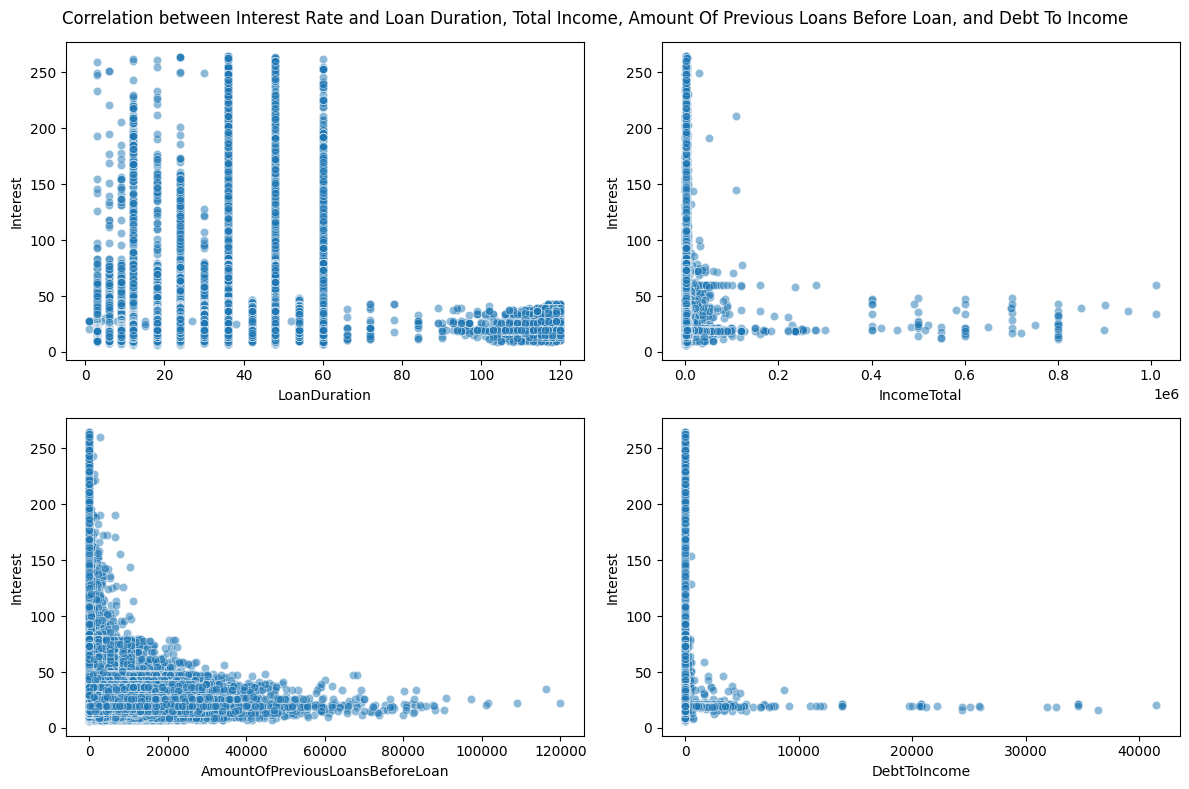

In [ ]:
scatterplot_fig = plt.figure(figsize=(12, 8))
correlation = []
corr_columns = ["LoanDuration", "IncomeTotal", "AmountOfPreviousLoansBeforeLoan", "DebtToIncome"]

for i in range(1, 5):
    column_name = corr_columns[i-1]
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=column_name, y="Interest", alpha=0.5)
    corr = df[column_name].corr(df["Interest"])
    correlation.append(corr)
    print("Correlation between Interest Rate and " + column_name + ":\n" + str(round(corr, 4)))

scatterplot_fig.suptitle("Correlation between Interest Rate and Loan Duration, Total Income, Amount Of Previous Loans Before Loan, and Debt To Income")

plt.tight_layout()
plt.show()

<a id="applied-and-received-amounts"></a>

### Applied and Received Amounts
We noticed that there are two similar columns, "AppliedAmount" and "Amount", in the dataset. This implies that sometimes borrowers get loaned a different amount than what they asked for.

#### 4.3: Confidence Intervals

If more than 5% of loans are approved for less than requested, the team may need to revise how loan amounts are communicated to applicants. Estimate this proportion using a confidence interval to support our recommendation.

1. Calculate the sample proportion of loans where the approved "Amount" is less than "AppliedAmount".
2. Find the margin of error for the 95% confidence interval. Recall that for proportions the mean is given by $\hat{p}$, and the standard error follows this equation: $\sqrt{\frac{\hat p (1-\hat p)}{n}}$.

    When using the `stats.norm.interval()` function for proportions the argument `loc` is the sample proportion, while `scale` is the standard error for proportions
3. Calculate the 95% confidence interval using the `stats` library.
</div>



In [ ]:
from scipy import stats
import numpy as np

num_differences = (df["Amount"] < df["AppliedAmount"]).sum()
n = len(df)
phat = num_differences / n
se = np.sqrt(phat * (1 - phat) / n)
confidence_interval = stats.norm.interval(0.95, loc=phat, scale=se)

print(f"Sample proportion: {phat:.4f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")

Sample proportion: 0.0275
95% Confidence Interval: (0.0270, 0.0280)


In [ ]:
# 🔒This cell is locked. You will not be able to edit it.
# print the results
print("The 95% confidence interval is", confidence_interval)

The 95% confidence interval is (np.float64(0.02698232853687249), np.float64(0.028017645379482474))


The proportion of loans where the requested amount differs from the given amount is pretty small, so it should be safe to only analyze one of those columns.

<a id="step-5"></a>

## Step 5: Modelling the Interest Rate
To make personalized loan offers, we decide to go one step further in our analysis and build a model to predict interest rates using different customer features. This will help we both be able to predict interest rates for new customers, and observe which features are actually statistically significant in determining the interest rates.

<a id="categorical-features"></a>

### Simple Linear Regression

To get our first model going we begin creating a simple linear regression. Based on the correlation analysis we did before, a good candidate for the independent variable is "AmountOfPreviousLoansBeforeLoan", which presented the strongest correlation with the target variable `"Interest"`.

<a id="ex7"></a>

#### 5.1: Training the Linear Regression

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

        
1. Create the $X$ variable of predictors with the "AmountOfPreviousLoansBeforeLoan" variable. Don't forget to add the constant column
2. Define the $Y$ variable, the dependent variable `"Interest`
3. Create and fit the linear regression model
4. Print the model summary, and analyze the results
</div>


In [ ]:
import statsmodels.api as sm

X_simple = sm.add_constant(df["AmountOfPreviousLoansBeforeLoan"])
Y_simple = df["Interest"]
model_simple = sm.OLS(Y_simple, X_simple)
results_simple = model_simple.fit()

print(results_simple.summary())

                            OLS Regression Results                            
Dep. Variable:               Interest   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                 1.211e+04
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        16:49:48   Log-Likelihood:            -1.6468e+06
No. Observations:              383382   AIC:                         3.294e+06
Df Residuals:                  383380   BIC:                         3.294e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

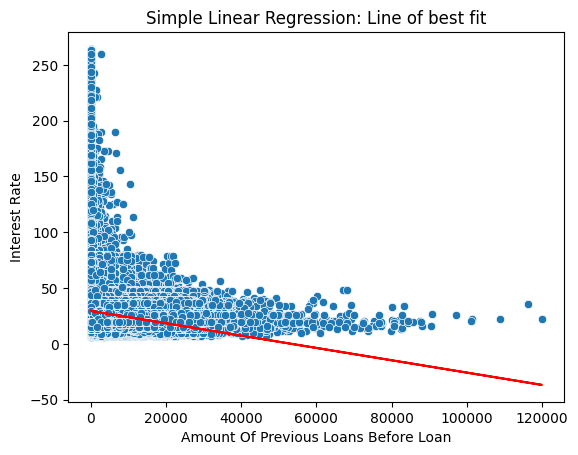

In [ ]:
plt.figure()
sns.scatterplot(data=df, x="AmountOfPreviousLoansBeforeLoan", y="Interest")
plt.plot(df["AmountOfPreviousLoansBeforeLoan"], results_simple.predict(X_simple), color="red")
plt.title("Simple Linear Regression: Line of best fit")
plt.xlabel("Amount Of Previous Loans Before Loan")
plt.ylabel("Interest Rate")
plt.show()

<a id="building-the-linear-regression-model"></a>

### Building a More Complex Linear Regression Model

Since predicting the interest rate using a single variable didn’t yield strong results, we must decide to take a more comprehensive approach. This time, we’ll build a more complex model that includes multiple variables—possibly even some categorical ones.

**Reflect**: which variables would we use as predictors?

<a id="ex8"></a>

#### 5.2: Building and refining the model
This time, we will make the decision on which variables to use. Iterate until we are satisfied with the result. If we need to write any additional code, we can add a new cell by clicking on the $+$ button, and work there.

1. Create the list `predictors` with the columns we want to use as predictors. Include all categorical columns we want to use as well
2. Create a list with only the categorical columns. Make sure this match with the ones we included in `predictors`. If we are not using any categorical variables, we can leave the list empty
3. Create the predictor variable `X`.
    1. Perform the dummy encoding (if using any categorical variables).
    2. Add the constant term.
4. Select the target feature, and save it in variable `Y`.
5. Define the Linear Regression model.
6. Fit the model
3. Iterate on the model (add and/or remove variables) until we are satisfied with the results. Feel free to use any of the features in the dataset we think are appropriate.
</div>

In [ ]:
X = pd.get_dummies(df[predictors], drop_first=True)
X = X.astype(int)
X = sm.add_constant(X)

Y = df["Interest"].astype(float)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Interest   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1059.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        16:53:41   Log-Likelihood:            -1.6380e+06
No. Observations:              383382   AIC:                         3.276e+06
Df Residuals:                  383352   BIC:                         3.276e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------